In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).





In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import wget


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
wget.download("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

100% [..........................................................................] 1423529 / 1423529

'housing (2).csv'

### EDA

* Load the data.

In [3]:
df= pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* Look at the `median_house_value` variable. Does it have a long tail? 

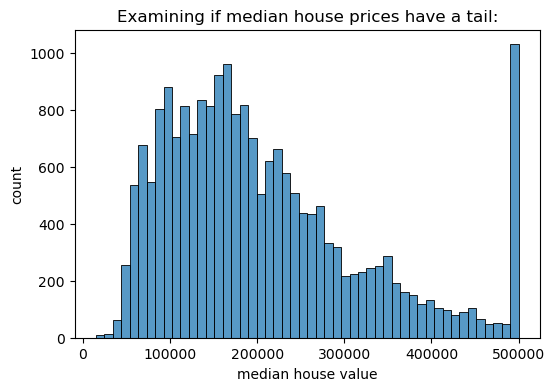

In [6]:
plt.figure(figsize=(6, 4))

# sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
sns.histplot(df["median_house_value"], bins=50)

plt.ylabel('count')
plt.xlabel('median house value')
plt.title('Examining if median house prices have a tail:')

plt.show()

#### Yes, It has a tail and a spike at an outlier location hmm
Tail definition: 

- This kind of distribution is difficult for ML models, the values in the tail have very few samples
- We want to get rid of the tail, and for that we pply natural logarithm to the median house value to make it more compact if possible
- Use np.log1p, this function takes the log, but adds 1 before applying it (this is done to be sure that we don't get 0 values)
- The new distribution should look more like a bell curve
- Not all data will have a resemblance to normal distribution
- Why is a normal distribution important? Because many ML algo assume that the underlying distribution is normal.
- also, the data distribution is right skewed, i.e. data is clustered to the left, and tail moves to the right
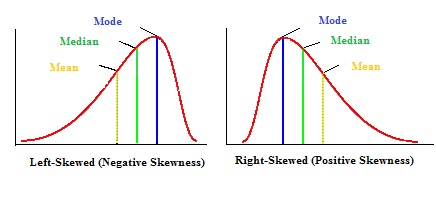
image from: https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/


### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

Select only them.

In [7]:
selected_columns = ["latitude","longitude","housing_median_age","total_rooms","total_bedrooms",
                             "population","households","median_income","median_house_value"]


df = df[selected_columns]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


### Question 1

Find a feature with missing values. How many missing values does it have?
- 207
- 307
- 408
- 508



In [8]:
df.isna().sum(axis=0)

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

It has 207 values

### Question 2

What's the median (50% percentile) for variable 'population'?
- 1133
- 1122
- 1166
- 1188



In [9]:
df.population.median()

1166.0

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.



In [10]:
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [11]:
features = df.drop(columns='median_house_value')
features.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462


In [12]:
target = df["median_house_value"]
target.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [13]:
log_target = np.log1p(target)
log_target

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

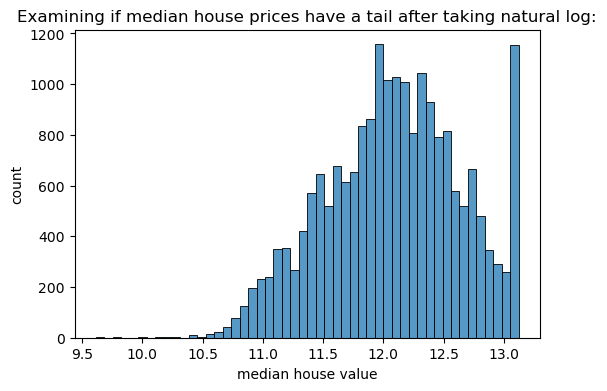

In [14]:
plt.figure(figsize=(6, 4))

# sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
sns.histplot(log_target, bins=50)

plt.ylabel('count')
plt.xlabel('median house value')
plt.title('Examining if median house prices have a tail after taking natural log:')

plt.show()

looks more normal, the tail has disappeared, though not centered around 0 and there is still a spike at the right-most.

#### Creating train-val-test sets

In [15]:
def create_train_val_test_split(features, log_target, seed=42, train_split = 0.6, val_split =0.2, test_split =0.2):

    features_temp = features.sample(frac=1, random_state = seed, ignore_index =True).copy()
    log_target_temp = log_target.sample(frac=1, random_state = seed, ignore_index =True).copy()
    

    x_train, x_val, x_test = np.split(features_temp, [int(len(features_temp)*train_split), int(len(features_temp)*(train_split+val_split))]) # split of 60:20:20
    y_train, y_val, y_test = np.split(log_target_temp, [int(len(log_target_temp)*train_split), int(len(log_target_temp)*(train_split+val_split))])
    
    splits = (x_train, x_val, x_test)
    
#     Sanity check 
#     for i,split in enumerate (splits):
#         print ("length of spit %d is %0.2f of total df length"\
#         %(i, len(split)/(len(x_train)+len(x_val)+len(x_test))))
    
    return x_train, x_val, x_test, y_train, y_val, y_test


In [16]:
x_train, x_val, x_test, y_train, y_val, y_test= create_train_val_test_split(features, log_target, seed = 42)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training [dataset] only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good



In [29]:
def check_isnull(df):
#   print (df.isnull().sum(),"\n")
    return sum(df.isnull().sum(axis=0)>0)
    

In [18]:
def deal_with_missing_data(splits = [x_train, x_val, x_test], fill_with = 0):
    """
    splits: expect 3 splits by default, but only x_train is call by name. Can only pass 2 splits
            like train and val only
    fillwith: Can be 0 or mean   
    
    """

    splits_alt = []
    
    # iterate through all of the x_train, x_val and x_test
    for i, split in enumerate (splits):
        
        # check if any of the splits has columns with missing values
        if (check_isnull(split) == True):
            
            # get column names, will return a numpy array
            column_names = split.columns[split.isnull().any()].to_list()
            
            # create copy of original split
            temp = split.copy()  
                    
            # for loop becuase columns with missing values might be more than 1
            # for each column:
            
            for column in column_names:
                
                # check for mean, otherwise will use default fill_with =0
                if fill_with == "mean":
                        fill_value = x_train[column].mean()
                elif fill_with == 0:                    
                        fill_value = 0
                        
                temp[column].fillna(fill_value, inplace=True) 
                
            # append to splits_alt for returning from function later
            splits_alt.append(temp)
            
        else:
            splits_alt.append(split.copy())
        
        # Check if each split has actually had it's missing values replaced
        # print ("split %d has %d columns with missing values" %(i, sum(splits_alt[i].isnull().sum()>0)))

        
    # it will return a varibale list each time depending of how many splits were passed to the function
    return splits_alt



In [19]:
# be careful while assigning, 
# if only x_train and x_val or x_test have been passed, it will return number of variables accordingly

x_train_0, x_val_0, x_test_0 = deal_with_missing_data(splits = [x_train, x_val, x_test], fill_with =0)

Yay. so we correctly replaced. We made copies to use the same train, val and test data for filling with mean 
of train dataset. Otherwise replacing with 0 would have overwritten.

Creating copies of train,val and test data with NaN values filled with mean of train dataset:

In [20]:
x_train_mean, x_val_mean, x_test_mean = deal_with_missing_data(splits = [x_train, x_val, x_test], fill_with = "mean" )


In [21]:
#train and get predictions on val/test set:

def train_linear_regression_reg(x_train,y_train,x_test, r=0):
    X =x_train
    y = y_train
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    # getting trained weights
    w0, w = w_full[0], w_full[1:]
    # prediction
    y_pred = w0 + x_test.dot(w)
    
    return y_pred

# getting rmse scores from predicted values:

def calculate_rmse(y_pred, y_test):
    error = y_pred - y_test
    mse = (error ** 2).mean()
    rmse =np.sqrt(mse)
    return rmse

In [22]:
#getting predictions for missing values replaced with 0
y_pred_val_0 = train_linear_regression_reg(x_train_0,y_train, x_val_0)

# evaluating predictions
rmse_0 = calculate_rmse(y_pred_val_0, y_val) 
round(rmse_0,2)

0.33

In [23]:
#getting predictions for missing values replaced with mean
y_pred_val_mean = train_linear_regression_reg(x_train_mean,y_train, x_val_mean)


# evaluating predictions
rmse_mean = calculate_rmse(y_pred_val_mean, y_val) 
round(rmse_mean,2)

0.33

Both histograms look similar

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

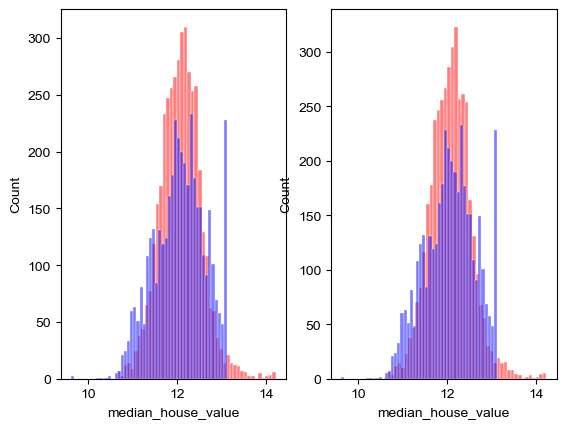

In [24]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2)

sns.set(rc={'figure.figsize':(15,10)})
#create boxplot in each subplot
sns.histplot(y_pred_val_0, color="red", alpha=0.5, bins=50, ax=axes[0])
sns.histplot(y_val, color="blue", alpha=0.5, bins=50, ax=axes[0])

sns.histplot(y_pred_val_mean, color="red", alpha=0.5, bins=50,ax=axes[1])
sns.histplot(y_val, color="blue", alpha=0.5, bins=50, ax=axes[1]) 

It means in this case, replacing with 0 or the mean both give equal results

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0
- 0.000001
- 0.001
- 0.0001



In [26]:
regularization_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
RMSE = []

for r in regularization_values:
    
    y_pred_val_0 = train_linear_regression_reg(x_train_0, y_train, x_val_0, r = r)
    rmse = calculate_rmse(y_pred_val_0, y_val) 
    RMSE.append(round(rmse,2))
    
best_RMSE = min(RMSE)
index_list = [index for index in range(len(RMSE)) if RMSE[index] == best_RMSE]
best_regularization_values = [regularization_values[index] for index in index_list]

print("RSME values are: ", RMSE)
print("Best regularization values are: ", best_regularization_values)
print ("The smallest best regularization value is: ", min(best_regularization_values))


RSME values are:  [0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.34, 0.34]
Best regularization values are:  [0, 1e-06, 0.0001, 0.001, 0.01, 0.1, 1]
The smallest best regularization value is:  0


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

Options:
- 0.16
- 0.00005
- 0.005
- 0.15555



In [27]:
# Create a function from previous ones:

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RMSE_seeds = []

for seed in seeds:

    x_train, x_val, _, y_train, y_val, _ = create_train_val_test_split(features, log_target, seed=seed)
    x_train_0, x_val_0 = deal_with_missing_data(splits = [x_train, x_val], fill_with =0)

    #getting predictions for missing values replaced with mean
    y_pred_val_0 = train_linear_regression_reg(x_train_0, y_train, x_val_0, r=0)

    # evaluating predictions
    rmse_0 = calculate_rmse(y_pred_val_0, y_val) 
    RMSE_seeds.append(rmse_0)

    
print("standard deviation of all RMSE with different seeds split is: ",round(np.std(RMSE_seeds), 3))
    
    
    

standard deviation of all RMSE with different seeds split is:  0.004


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- 0.35
- 0.135
- 0.450
- 0.245


In [28]:
x_train, x_val, x_test, y_train, y_val, y_test = create_train_val_test_split(features, log_target, seed= 9)
x_train, x_val, x_test = deal_with_missing_data(splits = [x_train, x_val, x_test], fill_with =0)

x_train_val = pd.concat([x_train, x_val])
y_train_val = np.concatenate([y_train, y_val])

#getting predictions for missing values replaced with mean
y_pred = train_linear_regression_reg(x_train_val, y_train_val, x_test, r=0.001)

# evaluating predictions
rmse = calculate_rmse(y_pred, y_test) 

print("The RMSE on the test set is: ", round(rmse,3))

The RMSE on the test set is:  0.345
